<a href="https://colab.research.google.com/github/aseleznevus/beauty_salon/blob/Main/beauty_salon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ эффективности маркетинга салона красоты

## 0. Задание

### 1. Основное задание

В данной задаче в рамках тестового задания необходимо построить сквозную аналитику для салона красоты. У салона есть реклама в онлайне и сайт, через который можно оставить заявку на услугу. 

При помощи сквозной аналитики нужно проследить путь от клика по рекламному объявлению до покупки и, таким образом, оценить эффективность маркетинга. 

Клик по рекламе трансформируется в лид (заявку), а лид превращается в клиента, который уже может совершить некоторое количество покупок.

Необходимо подготовить данные для отчета по сквозной аналитике. Для решения можно использовать на выбор: SQL или Python (Pandas). 

Данные поступают на вход в виде 3 csv файлов:

- ads.csv
- leads.csv
- purchases.csv

[Скачать данные можно здесь](https://drive.google.com/drive/folders/1MjYyPUqfqqLBPwf2GIDhUEa0Qdbk7gIS?usp=sharing)


### Связи

Связь между рекламой и заявкой определяется через utm метки - если набор меток из рекламного объявления совпадает с тем набором, который есть в заявке, то мы можем определить сколько денег было потрачено на привлечение этого лида 

Связь между лидом и продажами определяется через client_id.

[https://drawsql.app/teams/xo/diagrams/1/embed](https://drawsql.app/teams/xo/diagrams/1/embed)

**Атрибуция лид - покупка**

Каждому лиду “в зачет” идут только те покупки, которые клиент сделал в первые 15 дней после создания заявки. Из-за особенности бизнеса соотношение лидов и продаж - многие ко многим. Существующий клиент может купить услугу повторно через заведение новой заявки, а может создать две заявки подряд и после этого сделать покупку. 

**Чтобы однозначно атрибутировать продажи к лидам мы подготовили примеры:**

1. У клиента несколько лидов подряд, а затем продажа. Продажа засчитывается последнему лиду, который был создан не позже, чем 15 дней до. 

![Mind Map.jpg](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/f4be5e84-25bb-4a23-b9a0-a9f0ca39f8a9/Mind_Map.jpg)

1. У клиента несколько лидов подряд, а затем продажа. Продажа не засчитывается ни одному лиду, тк была создана позже 15 дней после последнего лида.

![Mind Map (1).jpg](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/bbe06478-446f-4bc5-b6b1-588494815d3a/Mind_Map_(1).jpg)

2. У клиента несколько лидов подряд, а затем продажа. Продажа засчитывается последнему лиду, который был создан не позже, чем 15 дней до. 

![Mind Map (2).jpg](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/f1368141-9f66-48ce-b0dd-20b3e308b60d/Mind_Map_(2).jpg)

1. У клиента несколько лидов и продаж вперемешку. Каждая продажа засчитывается ближайшему по времени лиду.
    
    ![Mind Map (3).jpg](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/befc0260-48b3-48c0-8162-00308b12678d/Mind_Map_(3).jpg)
    
** ! Обратите внимание**

- Постарайтесь не использовать циклы, если вы пишете на pandas. В 99% случаев они вам не нужны.
- В данных могут быть дубли, а также логические несоответствия. В случае выявления подобного - очистите данные по своему усмотрению и укажите это в Комментарии.
- Не для каждого рекламного показа может быть заведена заявка, даже если деньги на нее потрачены.
- Оформляйте код так, чтобы его было легко читать, масштабировать и переиспользовать (ООП)

### 2. Дополнительные задания

- [ ]  Вывести результат в Looker Studio. В этом случае метрики CPL и ROAS создайте в виде вычисляемых полей.
    - Для референса можно использовать:
        
        ![d;lkmdsa;dlk.PNG](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/6de0c729-b2c3-497d-ac79-29b5c2a120ea/dlkmdsadlk.png)
        
- [ ]  Покрыть пайплайн тестами и проверками на Data quality.
- [ ]  Поднять БД PostgreSQL, залить сырые данные и построить пайплайн так, чтобы читать и записывать данные из/в БД.

---

### Итоговый результат

1. Готовый отчет необходимо выгрузить в Google Spreadsheet и предоставить ссылку на него. 
    
    **Набор полей в отчете**:
    
    **Dimensions**
    
    - Дата
    - UTM source
    - UTM medium
    - UTM campaign
        
        **Metrics**
        
    - Количество кликов
    - Расходы на рекламу
    - Количество лидов
    - Количество покупок
    - Выручка от продаж
    - CPL  - Расходы/Количество лидов
    - ROAS - Выручка/Расходы

1. Код построения пайплайна необходимо выгрузить в Git репозиторий в виде .py файла и предоставить ссылку на репозиторий. Вы можете приложить решение в notebook, но это опционально. 

1. Результат по дополнительным заданиям (опционально): 
    - Приложите ссылку на отчет в Data Looker
    - Опишите, какие проверки интегрировали в скрипт
    - Приложите скрины из БД PostgreSQL с select запросами к сырым данным и отчету (4 скрина)

## 1. Предобработка данных

### 1.1. Вводные данные

В работу взяты данные о рекламных компаниях, лидах и продажах для салона красоты. 
Есть реклама в онлайне и сайт, через который можно оставить заявку на услугу. 

Клик по рекламе трансформируется в лид (заявку), а лид превращается в клиента, который может совершить некоторое количество покупок.

Период в течение которого лид должен становиться покупкой - 15 дней. Более длительные продажи не учитываются

**Задача анализа:** оценить эффективность рекламных кампаний салона красоты.

### 1.2. Подготовка данных

In [2]:
#Используемые библиотеки
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [3]:
#Прогрузим данные
#ads
! gdown --id 1KKA88zHcg9NLfrjMp9gWzYnj8MbI6NZP

#leads
! gdown --id 1b2I7GHfv09eck1LBK4dmNBOLemRuUTf-

#purchases
! gdown --id 1OIrLxvrngEb2qewCa7r4Uy4ZbK5vsZUG

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1KKA88zHcg9NLfrjMp9gWzYnj8MbI6NZP
To: /content/ads.csv
100% 612k/612k [00:00<00:00, 153MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1b2I7GHfv09eck1LBK4dmNBOLemRuUTf-
To: /content/leads.csv
100% 2.22M/2.22M [00:00<00:00, 162MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive

In [4]:
ads = pd.read_csv('/content/ads.csv')
leads = pd.read_csv('/content/leads.csv')
purchases = pd.read_csv('/content/purchases.csv')

### 1.3. Проверка данных

In [5]:
 #Проверим корректность предоставленных данных и внесем правки при необходимости.
 ads.head(5)

,created_at,d_ad_account_id,d_utm_source,d_utm_medium,d_utm_campaign,d_utm_content,d_utm_term,m_clicks,m_cost
0,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8404700756,NaN,2.0,48.840
1,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476161,NaN,3.0,100.776
2,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476162,NaN,1.0,10.140
3,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476163,NaN,0.0,0.000
4,2022-08-08,xo-for-client-ya,yandex,cpc,48306435,8813476164,NaN,0.0,0.000


In [6]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       8602 non-null   object 
 1   d_ad_account_id  8602 non-null   object 
 2   d_utm_source     8602 non-null   object 
 3   d_utm_medium     8602 non-null   object 
 4   d_utm_campaign   8602 non-null   int64  
 5   d_utm_content    8602 non-null   int64  
 6   d_utm_term       0 non-null      float64
 7   m_clicks         8602 non-null   float64
 8   m_cost           8602 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 605.0+ KB


In [7]:
leads.head()

,lead_created_at,lead_id,d_lead_utm_source,d_lead_utm_medium,d_lead_utm_campaign,d_lead_utm_content,d_lead_utm_term,client_id
0,2022-10-16,d8c4a9e8-4d4a-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,d8c4a9e9-4d4a-11ed-907e-848f69e142cf
1,2022-10-16,c48f9767-4d4a-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,c48f9768-4d4a-11ed-907e-848f69e142cf
2,2022-10-16,d74ac455-4d49-11ed-907e-848f69e142cf,vkontakte,social,kartasetevaya,NaN,NaN,f64c97d5-31ff-11ea-abeb-c412f533dba1
3,2022-10-16,0f69e77d-4d46-11ed-907e-848f69e142cf,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-16,620ee1eb-4d45-11ed-907e-848f69e142cf,ycard,social,all,NaN,NaN,NaN


In [8]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23540 entries, 0 to 23539
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_created_at      23540 non-null  object
 1   lead_id              23540 non-null  object
 2   d_lead_utm_source    12331 non-null  object
 3   d_lead_utm_medium    10100 non-null  object
 4   d_lead_utm_campaign  9569 non-null   object
 5   d_lead_utm_content   3338 non-null   object
 6   d_lead_utm_term      328 non-null    object
 7   client_id            18601 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


In [9]:
purchases.head()

,purchase_created_at,purchase_id,client_id,m_purchase_amount
0,2022-02-21,d3198d39-6d16-40c9-bff7-aa28bd6e2991,7011bdcd-6fd8-11e7-80fc-c412f533dba1,9950.0
1,2022-02-21,48a0ad24-77aa-4064-a971-dd0d6f1f6c50,a2771bb0-6fd6-11e7-80fc-c412f533dba1,8700.0
2,2022-02-21,267ff20f-a56c-480a-b2f7-1f7b1a746f9f,2687f503-6fd7-11e7-80fc-c412f533dba1,0.0
3,2022-02-21,19fba5f0-785d-45bd-903a-34ba529c6404,01122a97-45bc-11eb-ac23-c412f533dba1,8700.0
4,2022-02-21,00ac921d-32e3-4200-9435-a46d5fef4a29,a55b8c4e-d5a3-11e9-abbe-c412f533dba1,500.0


In [10]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66180 entries, 0 to 66179
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   purchase_created_at  66180 non-null  object 
 1   purchase_id          66180 non-null  object 
 2   client_id            66179 non-null  object 
 3   m_purchase_amount    66180 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


Названия столбцов корректны, есть отсутствующие значения.
Требуется замена типов столбцов для дат

In [11]:
#приведем типы столбцов в соответствие
ads['created_at'] = pd.to_datetime(ads['created_at'])
leads['lead_created_at'] = pd.to_datetime(leads['lead_created_at'])
purchases['purchase_created_at'] = pd.to_datetime(purchases['purchase_created_at'])

ads['d_utm_campaign'] = ads['d_utm_campaign'].astype('str')

In [12]:
#проверим данные на дубликаты
ads.duplicated().sum() 

0

In [13]:
leads.duplicated().sum() 

0

In [14]:
purchases.duplicated().sum() 

0

In [15]:
#Изучим пропуски в столбцах и определим на что их можно заменить.
ads.isna().sum().sort_values(ascending=False)

d_utm_term         8602
created_at            0
d_ad_account_id       0
d_utm_source          0
d_utm_medium          0
d_utm_campaign        0
d_utm_content         0
m_clicks              0
m_cost                0
dtype: int64

Метка utm_term - не заполнена для всего датасета ads.
Данный столбец можно исключить.

In [16]:
ads = ads.drop('d_utm_term', axis=1)

In [17]:
leads.isna().sum().sort_values(ascending=False)

d_lead_utm_term        23212
d_lead_utm_content     20202
d_lead_utm_campaign    13971
d_lead_utm_medium      13440
d_lead_utm_source      11209
client_id               4939
lead_created_at            0
lead_id                    0
dtype: int64

In [18]:
#определим долю пропусков дл каждого из столбцов
pd.DataFrame(round(leads.isna().mean()*100,).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
d_lead_utm_term,99.000000
d_lead_utm_content,86.000000
d_lead_utm_campaign,59.000000
d_lead_utm_medium,57.000000
d_lead_utm_source,48.000000
client_id,21.000000
lead_created_at,0.000000
lead_id,0.000000


In [19]:
#удалим практически полностью отсутствующие столбцы
leads = leads.drop(['d_lead_utm_term'], axis=1)

In [20]:
leads = leads.drop(['d_lead_utm_content'], axis=1)

In [21]:
purchases.isna().sum().sort_values(ascending=False)

client_id              1
purchase_created_at    0
purchase_id            0
m_purchase_amount      0
dtype: int64

In [22]:
#удалим отсутствующие значение. Использовать данные без привязки к ID клиента некорректно
purchases['client_id'] = purchases['client_id'].dropna()

### 1.4. Выводы

В работу было принято три массива данных.
Они были проверены на отсутствующие значения, дубликаты.
Столбцы приведены в соответствии с типом данных.

Можно приступать к анализу информации.

## Анализ метрик

### 2.1. Объединение таблиц

Присоединим таблицу с лидами к таблице с рекламой

Связь между рекламой и заявкой определяется через utm метки - если набор меток из рекламного объявления совпадает с тем набором, который есть в заявке, то мы можем определить сколько денег было потрачено на привлечение этого лида 

In [23]:
data = ads.merge(leads, left_on=('d_utm_source', 'd_utm_medium',  'd_utm_campaign'), right_on=('d_lead_utm_source', 'd_lead_utm_medium', 'd_lead_utm_campaign'), how='inner')


Добавим таблицу с продажами.

Атрибуция лид - покупка

Каждому лиду “в зачет” идут только те покупки, которые клиент сделал в первые 15 дней после создания заявки. Из-за особенности бизнеса соотношение лидов и продаж - многие ко многим. Существующий клиент может купить услугу повторно через заведение новой заявки, а может создать две заявки подряд и после этого сделать покупку.

In [24]:
all_data = data.merge(purchases, left_on=('client_id'), right_on=('client_id'), how='inner')

In [25]:
need_data = all_data.loc[(all_data['purchase_created_at'] - all_data['lead_created_at']).dt.days <= 15]

In [26]:
#Посчитаем количество кликов и расходы для каждой из компаний
clicks = need_data.pivot_table(index=[('d_utm_campaign')], values=('m_clicks', 'm_cost'), aggfunc='sum')
clicks = clicks.reset_index()

In [27]:
#добавим количество лидов и покупок
ppl_count = need_data.pivot_table(index=[('d_utm_campaign')], values=('lead_id', 'purchase_id'), aggfunc='count')
ppl_count = ppl_count.reset_index()

In [28]:
#добавим выручку от продаж
purchase_sum = need_data.pivot_table(index=[('d_utm_campaign')], values=('m_purchase_amount'), aggfunc='sum')
purchase_sum = purchase_sum.reset_index()

In [29]:
#Соберем итоговую таблицу
total_data = need_data[['created_at', 'd_utm_source', 'd_utm_medium', 'd_utm_campaign']]

In [30]:
total_data = total_data.merge(clicks, left_on=('d_utm_campaign'), right_on=('d_utm_campaign'), how='inner')
total_data = total_data.merge(ppl_count, left_on=('d_utm_campaign'), right_on=('d_utm_campaign'), how='inner')
total_data = total_data.merge(purchase_sum, left_on=('d_utm_campaign'), right_on=('d_utm_campaign'), how='inner')

In [31]:
#добавим метрики CPL и ROAS
total_data['cpl'] = total_data['m_cost'] / total_data['lead_id']
total_data['roas'] = total_data['m_purchase_amount'] / total_data['m_cost']

In [32]:
#оставим только уникальные значения по кампаниям
total_data = total_data.drop_duplicates (subset=['d_utm_campaign'])

#переименуем столбцы удобно
total_data.columns = ['date', 'utm_source', 'utm_medium', 'utm_campaign', 'click_count', 'click_costs_sum', 'leads_count', 'purchases_count', 'purchases_sum', 'cpl', 'roas']

In [33]:
total_data.head()

,date,utm_source,utm_medium,utm_campaign,click_count,click_costs_sum,leads_count,purchases_count,purchases_sum,cpl,roas
0,2022-08-08,yandex,cpc,48306435,199200.0,4.797818e+06,143520,143520,6.912267e+08,33.429616,144.071041
143520,2022-08-08,yandex,cpc,48306450,4610304.0,1.241578e+08,690000,690000,4.016471e+09,179.938829,32.349732
833520,2022-08-08,yandex,cpc,48306487,142560.0,3.079546e+06,60665,60665,3.628032e+08,50.763144,117.810598
894185,2022-08-08,yandex,cpc,48306518,17225.0,3.308280e+05,60325,60325,1.095767e+08,5.484094,331.219676
954510,2022-08-08,yandex,cpc,48306473,42066.0,7.608955e+05,17575,17575,7.051830e+07,43.294197,92.678034


In [ ]:
total_data.to_excel("beauty_salon_analitics.xlsx")

### 2.2. Графики CPL и ROAS

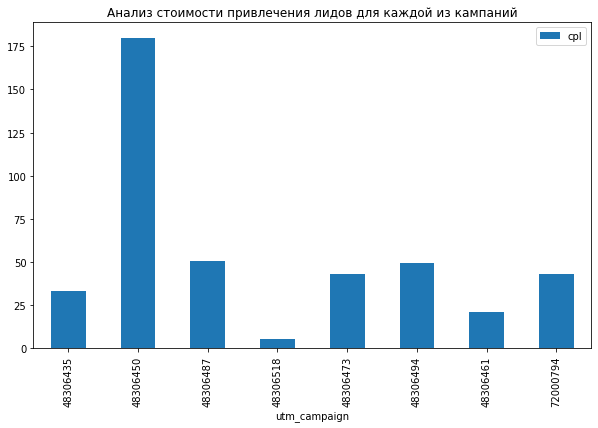

In [51]:
#соотнесем расходы на лиды и окупаемость рекламы.
total_data.plot.bar(x='utm_campaign', y='cpl', figsize=(10,6))
plt.title('Анализ стоимости привлечения лидов для каждой из кампаний​')
plt.show()

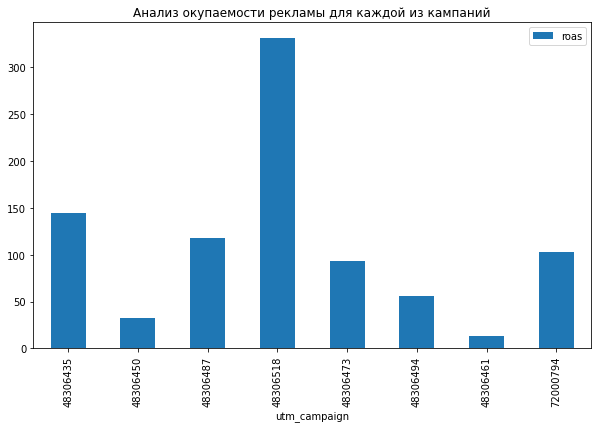

In [52]:
total_data.plot.bar(x='utm_campaign', y='roas', figsize=(10,6))
plt.title('Анализ окупаемости рекламы для каждой из кампаний​')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


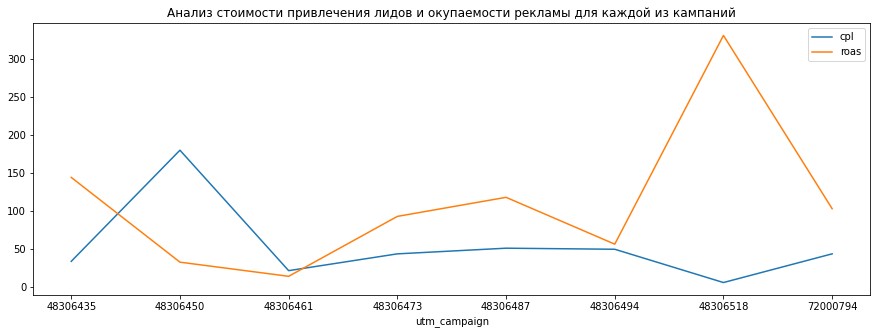

In [53]:
cpl_roas = total_data.groupby('utm_campaign')['cpl', 'roas'].sum()
cpl_roas.plot(figsize=(15, 5), title=('Анализ стоимости привлечения лидов и окупаемости рекламы для каждой из кампаний')) 
plt.show()